Посмотрим одноразмерные ковариационные функции (для которых равномерная выборка одномерна)

Попробуем апрокссимировать гауссовские процессы на основе данных ковариационных функций с помощью гауссовских процессов на основе ядер: exponential , Matern32 , Matern52 , periodic_matern32

In [44]:
import numpy as np
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd
import GPy
import matplotlib.pyplot as plt
%matplotlib inline

function_names = ['rosenbrock', 'michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'Sinusoidal', 'Gramacy']

def functionDoESpecial(X, functionName):
    x = np.array(X, copy=True)

    sqr = lambda x: x**2


    if functionName.lower() ==  'rosenbrock':
        functionName = 'rosenbrock'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)


    elif functionName.lower() == 'michalewicz':
        functionName = 'michalewicz';

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)


    elif functionName.lower() == 'ackley1':
        functionName = 'ackley1'

        x = 32.768 * (2 * x - 1)
        numberDimensions = x.shape[1]
        n = numberDimensions
        a = 20
        b = 0.2
        c = 2 * np.pi
        s1 = 0
        s2 = 0
        for i in range(numberDimensions):
            s1 = s1 + x[:, i]**2
            s2 = s2 + np.cos(c * x[:, i])

        y = -a * np.exp(-b * np.sqrt(1.0 / n * s1)) + a + np.exp(1)

    elif functionName.lower() == 'gsobol':
        functionName = 'gSobol'

        # x in [0,1]
        numberDimensions = x.shape[1]
        a = [4.5, 4.5, 1, 0, 1, 9, 0,9]
        y = 1
        for i in range(numberDimensions):
            y = y * (np.abs(4 * x[:, i] - 2) + a[i]) / (1 + a[i])

    elif functionName.lower() == 'michalewicz5':
        functionName = 'michalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)

    elif functionName.lower() == 'sqmichalewicz5':
        functionName = 'sqMichalewicz5'

        # rescale to 0<x<np.pi
        x = np.pi * x
        numberDimensions = x.shape[1]

        y = 0
        for i in range(numberDimensions):
            y = y + np.sin(x[:, i]) * np.sin(x[:, i]**2 / np.pi)**2

    elif functionName.lower() == 'rosenbrock5':
        functionName = 'rosenbrock5'

        c = 2.048
        x = c * (2 * x - 1)
        y = np.sum((1 - x[:, :-1])**2 + \
                   100 * (x[:, 1:] - x[:, :-1]**2)**2, axis=1)
        
    elif functionName.lower() == 'sinusoidal':
        functionName = 'sinusoidal'

        y=np.ravel(np.cos(x[:,0]) + np.sin(3*x[:,0]))
        
    elif functionName.lower() == 'gramacy':
        functionName = 'gramacy'
        y=np.ravel(np.sin(10*np.pi*x) / (2*x) + (x-1)**4)

    return y

{'dataplot': [<matplotlib.collections.PathCollection at 0x2eb644a1320>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x2eb60ae92b0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x2eb644a10b8>]}

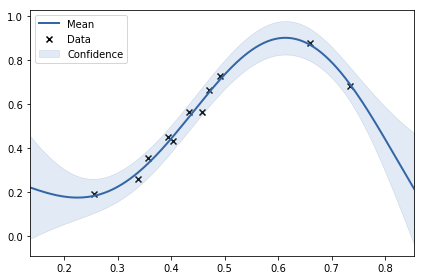

In [48]:
f_name = 'michalewicz5'
a = np.random.uniform (0,1,(1,1))
b = functionDoESpecial (a, f_name)
for i in range (10):
    X = np.random.uniform (0,1, (1,1))
    y = functionDoESpecial (X, f_name) + np.random.normal(0,0.07)
    a=np.append (a,X)
    b=np.append (b,y)
    
gp_x = a.reshape(a.shape[0], 1)
gp_y = b.reshape(b.shape[0], 1)
kern = GPy.kern.Minimax(1, 1)
model = GPy.models.GPRegression(gp_x, gp_y, kern)
model.optimize()
a = np.random.uniform (0,1,(1,1))
xx = a.reshape(a.shape[0], 1)

model.plot()

Проведем тесты

In [32]:
kern_name = [GPy.kern.Exponential, GPy.kern.Matern32, GPy.kern.Matern52, GPy.kern.PeriodicMatern32, GPy.kern.Minimax] #ядра гауссовских процессов
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'Sinusoidal', 'Gramacy']


def test (f_name, k1, i1, m1, ker_name):
#k1 - количество тестов
#i1 - количество точек в обучающей выборке
#m1 - количество точек для подсчёта MAE, MSE
    MAE_exp = []
    MSE_exp = []
    for k in range (k1):
        a=[]
        b=[]
        for i in range (i1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X)
            b=np.append (b,y)

        gp_x = a.reshape(a.shape[0], 1)
        gp_y = b.reshape(b.shape[0], 1)
        kern_1 = ker_name(1)
        model = GPy.models.GPRegression(gp_x, gp_y, kern_1)
        model.optimize()
        a=[]
        b=[]
        for i in range (m1):
            X = np.random.uniform (0,1,(1,1))
            y = functionDoESpecial (X, f_name)
            a=np.append (a,X)
            b=np.append (b,y)

        gp_xx = a.reshape(a.shape[0], 1)
        gp_yy=model.predict(gp_xx)
        c=gp_yy[0]
        MAE_exp=np.append(MAE_exp, MAE(b,c))
        MSE_exp=np.append(MSE_exp, MSE(b,c))
    return MAE_exp, MSE_exp

In [33]:
import warnings
warnings.filterwarnings('ignore')

d1 = pd.DataFrame(columns=['Name','MSE_exp', 'MSE_mt32', 'MSE_mt52',  'MSE_pmt32', 'MSE_Minimax'])
d2 = pd.DataFrame(columns=['Name','MAE_exp', 'MAE_mt32', 'MAE_mt52',  'MAE_pmt32', 'MAE_Minimax'])

i=0
for k in range (7):
    for f_name in function_names:
        MSE_error=[f_name+str(k)]
        MAE_error=[f_name+str(k)]
        for ker_name in kern_name:
            text = test (f_name, 50, 30+ k*5,100, ker_name)
            MAE_1 = text[0]
            MSE_1 = text[1]
            MAE_=round(np.mean (MAE_1),6)
            MSE_=round(np.mean (MSE_1),6)
            MSE_error = np.append (MSE_error,MSE_)
            MAE_error = np.append (MAE_error,MAE_)
        d1.loc[i] = MSE_error
        d2.loc[i] = MAE_error
        i=i+1
    print (k)

0
1
2
3
4
5
6


In [34]:
print (d2)

               Name   MAE_exp  MAE_mt32  MAE_mt52 MAE_pmt32 MAE_Minimax
0      michalewicz0  0.006445  0.000926  0.000847  0.000111     8.2e-05
1          ackley10  0.285434  1.523195  3.053864  3.669482    1.745035
2           gsobol0   0.00271  0.000655  0.000866  0.007389    0.009383
3     michalewicz50  0.009207  0.004533  0.000631   9.5e-05     8.5e-05
4   sqmichalewicz50  0.007731  0.001531  0.000755  0.000338    0.001492
5       Sinusoidal0  0.009866   0.00064   8.6e-05     1e-05     1.3e-05
6          Gramacy0  0.637784  0.260325  0.584573  1.008936    0.455549
7      michalewicz1  0.005648  0.000998  0.000267   8.4e-05     6.5e-05
8          ackley11   0.23866  0.944238  3.157604  3.459895    1.138962
9           gsobol1  0.001685  0.000713  0.000725  0.004077    0.009122
10    michalewicz51  0.005406  0.001255  0.000612   6.8e-05     7.2e-05
11  sqmichalewicz51  0.005599  0.000865  0.000107    0.0002    0.000245
12      Sinusoidal1  0.006998  0.000336   4.4e-05     7e-06     

In [43]:
d1.to_csv('example.csv', sep='\t')

Посмотрим на кривые Долана-Мора

По определению, по оси абцисс данных графиков откладывается величина p равная отношению ошибки рассматриваемого (i-го) аппроксиматора к минимальной ошибке среди всех методов на конкретной задаче.
По оси ординат откладывается доля задач, на которых ошибка метода, нормированная на минимальное значение ошибки среди всех методов, не превосходит величины p.

In [46]:
Names = ['MAE_exp', 'MAE_mt32', 'MAE_mt52', 'MAE_pmt32', 'MAE_Minimax']

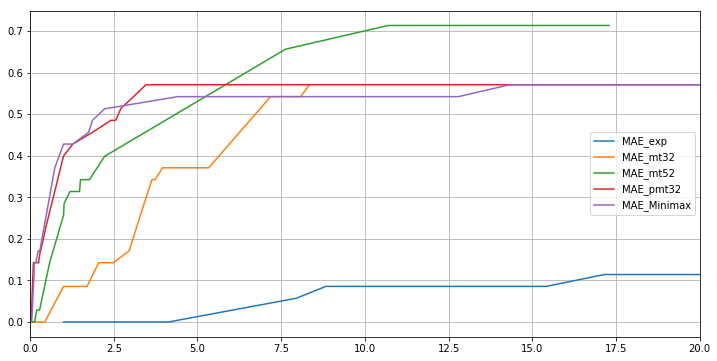

In [47]:
import pylab
plt.figure(figsize=(12, 6))

for name in Names:
    x=[]
    for i in range(35):
        x=np.append(x,float(d2[name][i]) / float(d2.iloc[i].min()))
    y=[]
    x=sorted(x)
    for ab in x:
        m=0
        for i in range(35):
            if (float(d2[name][i]) / float((d2.min()).min())) < ab:
                m=m+1
        y=np.append (y,m)
    y=y/35
    plt.plot (x,y, label = name)
    plt.legend()
    print ('')
plt.xlim(0,20)
plt.grid()
pylab.savefig('foo1.png')